In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, optimize

# Selección de Acciones

In [2]:
df = yf.download(tickers=["^GSPC","BRK-B","JPM","GS","LLY","XOM","TSM","ORCL","IBM","UBER","SAP"],end="2025-11-14",period="5y",interval="1mo",auto_adjust=True)
df = df['Close'].copy()

names_dict = dict()

for ticker in df.columns:
    names_dict[ticker] = yf.Ticker(ticker).info["longName"]

df.rename(columns=names_dict,inplace=True)
df.columns.name = "Compañía"
df.index.name = "Fecha"
df.sort_index(ascending=True,inplace=True)

print("No hay datos faltantes") if not df.isna().any().any() else print("Faltan datos")

[*********************100%***********************]  11 of 11 completed


No hay datos faltantes


In [3]:
print(f"Dimension del DataFrame: {df.shape}")
df.head()

Dimension del DataFrame: (60, 11)


Compañía,Berkshire Hathaway Inc.,"The Goldman Sachs Group, Inc.",International Business Machines Corporation,JPMorgan Chase & Co.,Eli Lilly and Company,Oracle Corporation,SAP SE,Taiwan Semiconductor Manufacturing Company Limited,"Uber Technologies, Inc.",Exxon Mobil Corporation,S&P 500
Fecha,,,,,,,,,,,
2020-12-01,231.869995,234.059662,97.843636,111.602249,160.225571,60.339321,119.981964,100.116669,51.000000,33.689529,3756.070068
2021-01-01,227.869995,241.992722,92.581474,113.007484,197.359146,56.365826,116.126427,112.046112,50.930000,36.648186,3714.239990
2021-02-01,240.509995,285.104675,92.441544,130.186447,194.436249,60.401665,113.503922,116.121536,51.750000,44.437153,3811.149902
2021-03-01,255.470001,291.815552,104.964066,134.662521,178.028580,65.701218,112.988617,109.058708,54.509998,46.405331,3972.889893
2021-04-01,274.950012,312.179047,111.753723,136.060150,174.169174,70.963303,128.769669,108.044342,54.770000,47.577312,4181.169922


# Visualización de Datos

## Precio

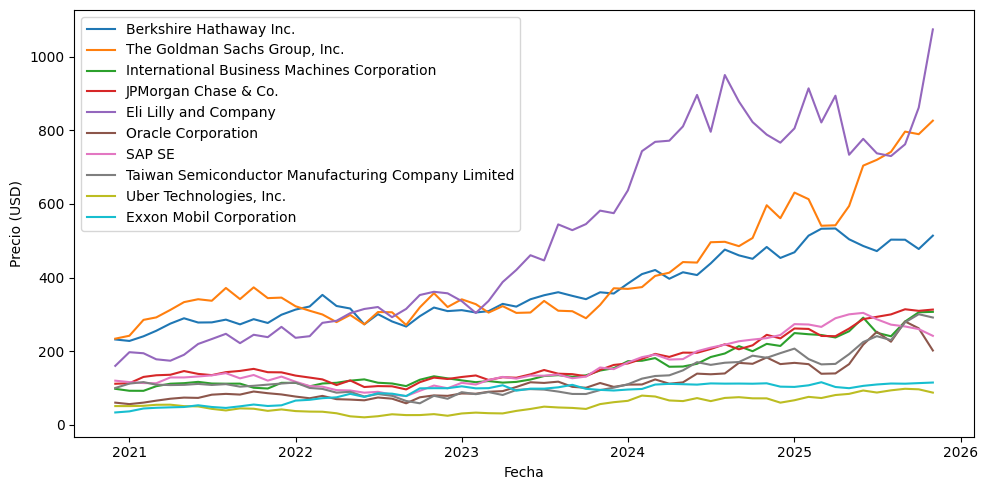

In [4]:
plt.figure(figsize=(10,5))
for stock in df.columns[:-1]:
    sns.lineplot(data=df,x="Fecha",y=stock,label=stock)
plt.ylabel("Precio (USD)")
plt.legend()
plt.tight_layout()
plt.show()

# Distribución y Correlación de Precios

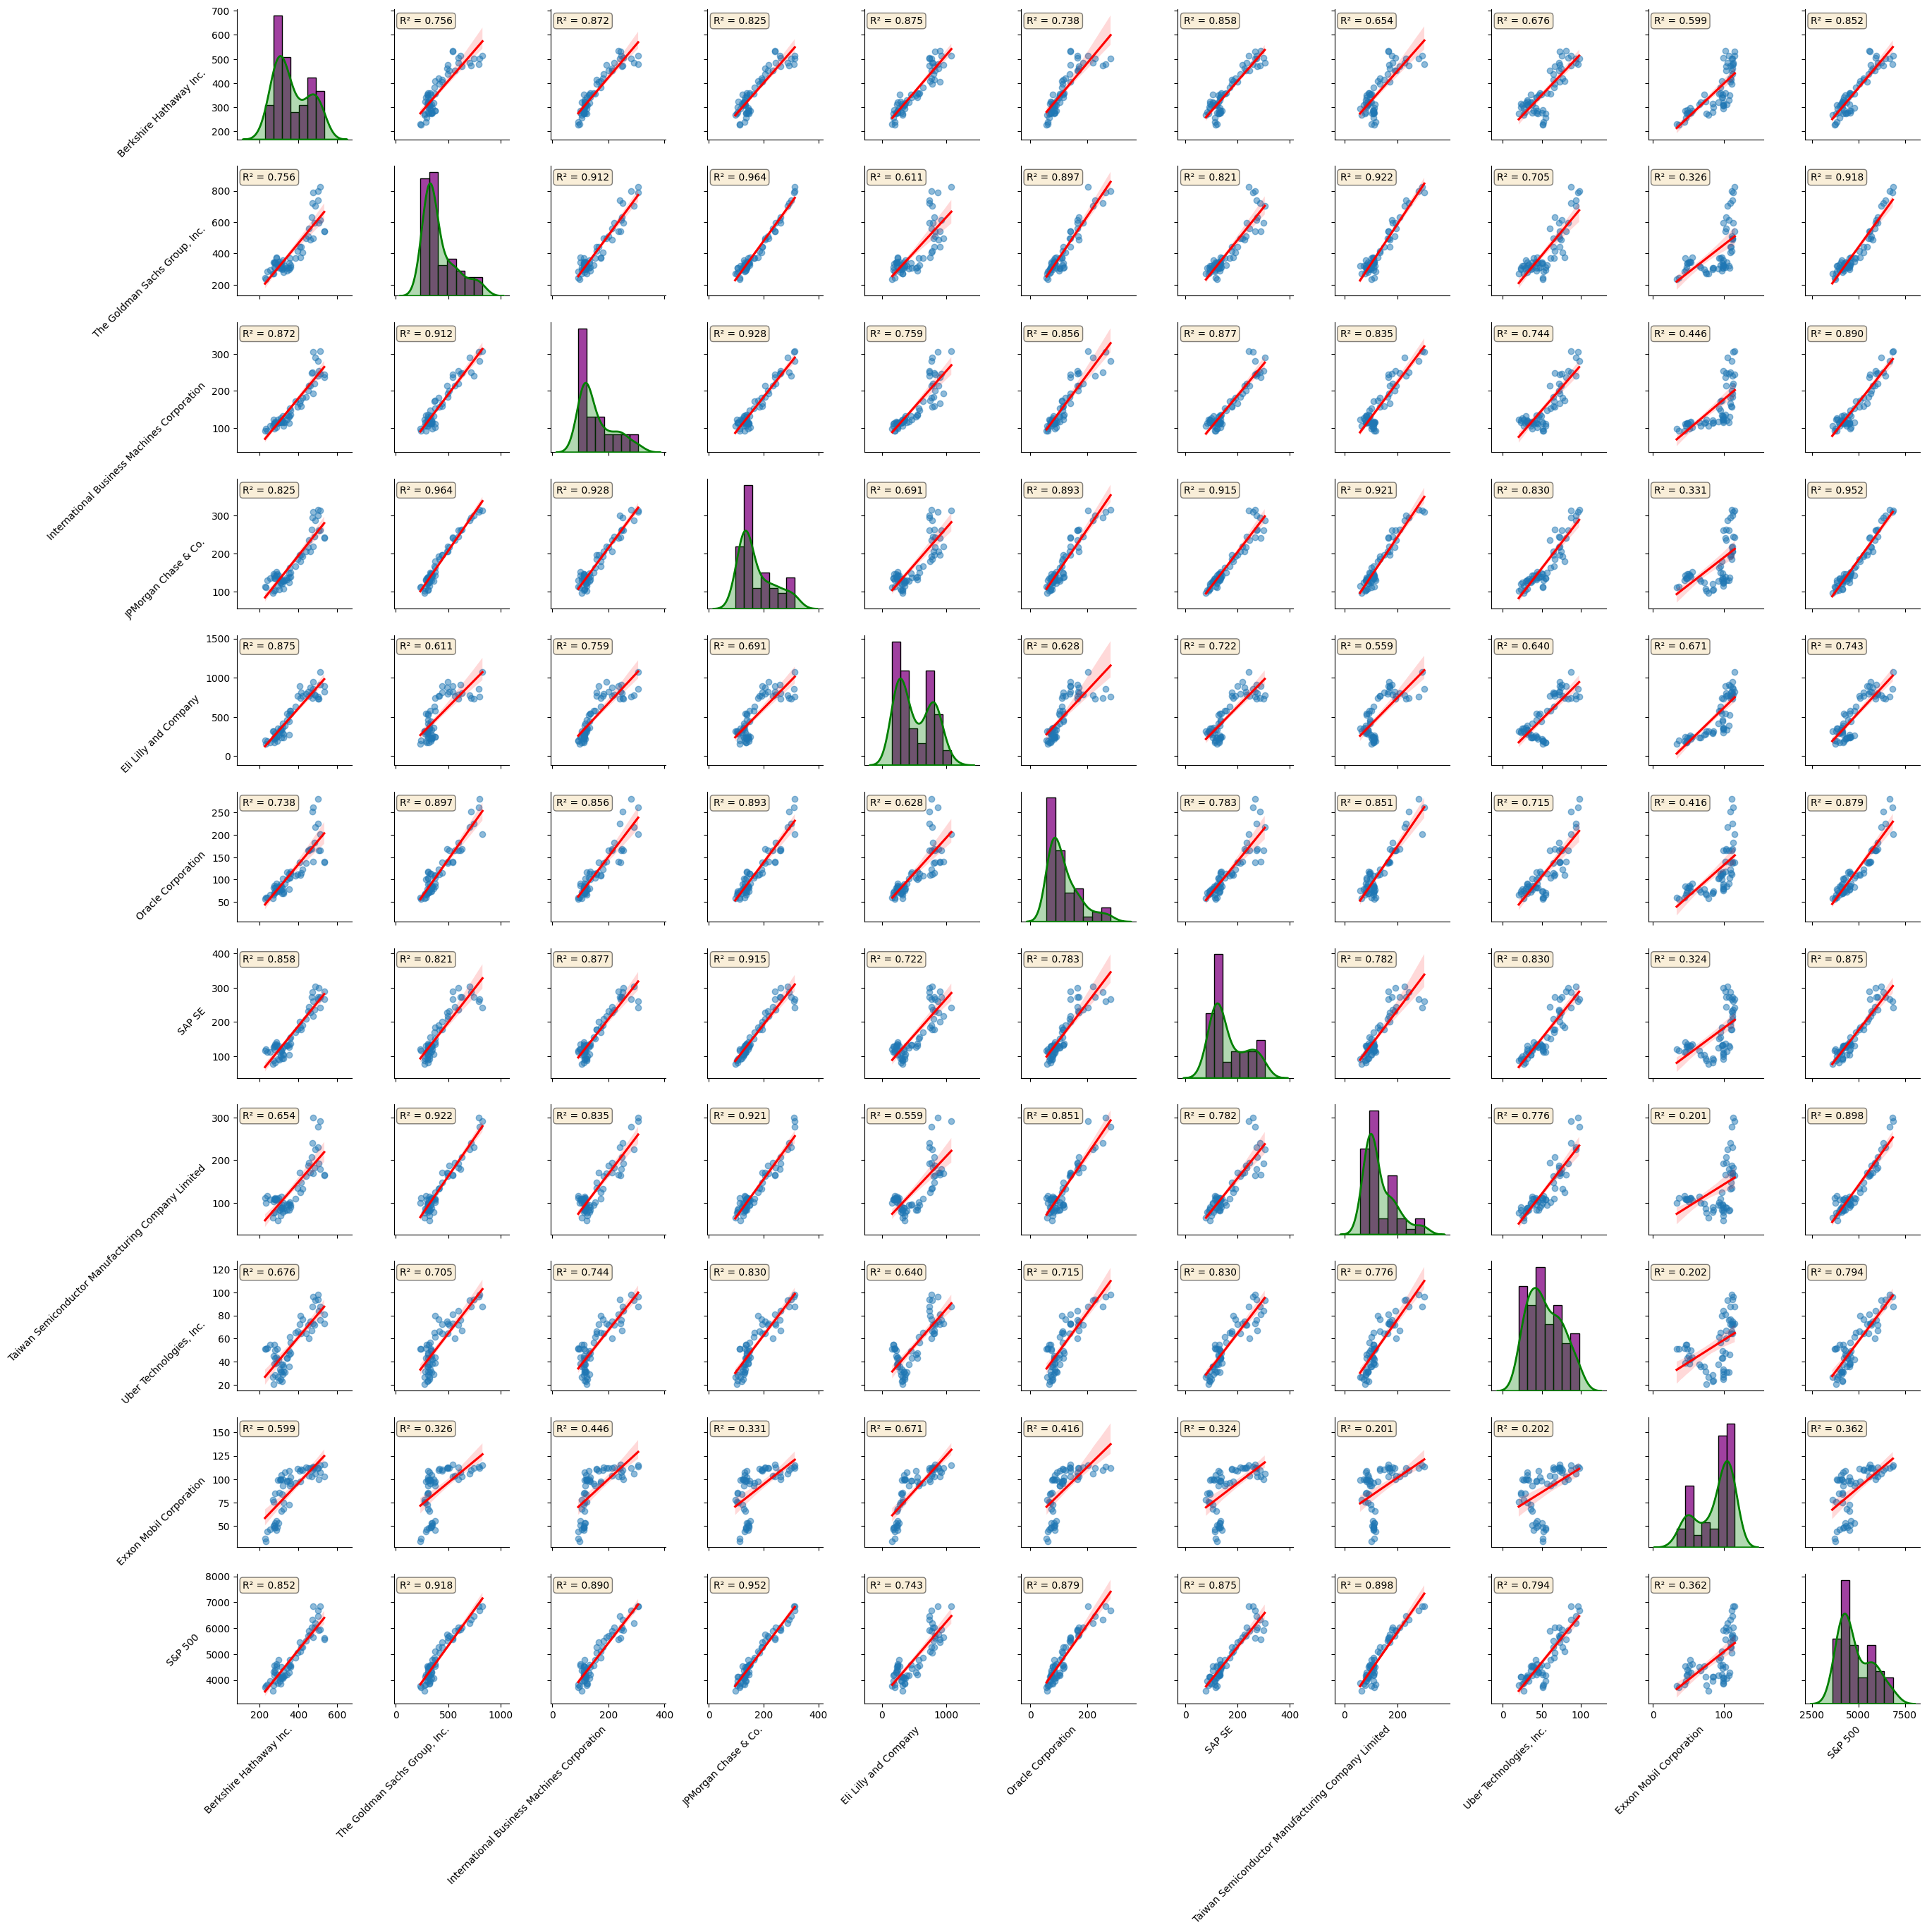

In [5]:
g = sns.PairGrid(df, diag_sharey=False)

def regplot_with_r2(x, y, **kwargs):
    ax = plt.gca()
    sns.regplot(x=x, y=y, scatter_kws={'alpha': 0.5}, line_kws={'color':"red"}, ax=ax)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r2 = r_value**2
    ax.text(0.05, 0.95, f'R² = {r2:.3f}', transform=ax.transAxes, 
            fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

def diag_plot(x, **kwargs):
    ax = plt.gca()
    sns.histplot(x, stat="density", kde=False, color="purple", ax=ax)
    sns.kdeplot(x, color="green", fill=True, alpha=0.3, linewidth=2, ax=ax)

g.map_upper(regplot_with_r2)
g.map_lower(regplot_with_r2)
g.map_diag(diag_plot)

for ax in g.axes[-1,:]:
    ax.set_xlabel(ax.get_xlabel(), rotation=45, ha='right') 
for ax in g.axes[:,0]:
    ax.set_ylabel(ax.get_ylabel(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Rendimiento Porcentual Simple

In [6]:
df_r_decimal = df.pct_change().dropna(axis="index").copy()
print(f"Dimension del DataFrame: {df_r_decimal.shape}")
df_r_decimal.head()

Dimension del DataFrame: (59, 11)


Compañía,Berkshire Hathaway Inc.,"The Goldman Sachs Group, Inc.",International Business Machines Corporation,JPMorgan Chase & Co.,Eli Lilly and Company,Oracle Corporation,SAP SE,Taiwan Semiconductor Manufacturing Company Limited,"Uber Technologies, Inc.",Exxon Mobil Corporation,S&P 500
Fecha,,,,,,,,,,,
2021-01-01,-0.017251,0.033893,-0.053781,0.012591,0.231758,-0.065853,-0.032134,0.119155,-0.001373,0.087821,-0.011137
2021-02-01,0.055470,0.178154,-0.001511,0.152016,-0.014810,0.071601,-0.022583,0.036373,0.016101,0.212533,0.026091
2021-03-01,0.062201,0.023538,0.135464,0.034382,-0.084386,0.087739,-0.004540,-0.060823,0.053333,0.044291,0.042439
2021-04-01,0.076252,0.069782,0.064686,0.010379,-0.021679,0.080091,0.139669,-0.009301,0.004770,0.025255,0.052425
2021-05-01,0.052700,0.067642,0.013110,0.074100,0.092849,0.043418,-0.000072,0.005311,-0.071937,0.019741,0.005486


In [7]:
df_r_percentage = (df_r_decimal*100).copy()
print(f"Dimension del DataFrame: {df_r_percentage.shape}")
df_r_percentage.head()

Dimension del DataFrame: (59, 11)


Compañía,Berkshire Hathaway Inc.,"The Goldman Sachs Group, Inc.",International Business Machines Corporation,JPMorgan Chase & Co.,Eli Lilly and Company,Oracle Corporation,SAP SE,Taiwan Semiconductor Manufacturing Company Limited,"Uber Technologies, Inc.",Exxon Mobil Corporation,S&P 500
Fecha,,,,,,,,,,,
2021-01-01,-1.725105,3.389332,-5.378133,1.259146,23.175811,-6.585251,-3.213431,11.915542,-0.137254,8.782124,-1.113666
2021-02-01,5.547022,17.815393,-0.151143,15.201615,-1.481004,7.160082,-2.258319,3.637274,1.610052,21.253350,2.609145
2021-03-01,6.220119,2.353829,13.546422,3.438203,-8.438585,8.773852,-0.453997,-6.082272,5.333330,4.429127,4.243863
2021-04-01,7.625166,6.978208,6.468554,1.037875,-2.167857,8.009113,13.966939,-0.930110,0.476981,2.525533,5.242532
2021-05-01,5.270045,6.764242,1.310956,7.410015,9.284917,4.341844,-0.007157,0.531099,-7.193717,1.974125,0.548649


# 1. Promedio de Rendimientos Mensuales

In [8]:
vector_promedio = df_r_percentage.drop(columns="S&P 500").mean()
vector_promedio.apply(lambda decimal : f"{decimal:.6f} [%]")

Compañía
Berkshire Hathaway Inc.                               1.506637 [%]
The Goldman Sachs Group, Inc.                         2.463522 [%]
International Business Machines Corporation           2.213305 [%]
JPMorgan Chase & Co.                                  2.002325 [%]
Eli Lilly and Company                                 3.703517 [%]
Oracle Corporation                                    2.645574 [%]
SAP SE                                                1.466839 [%]
Taiwan Semiconductor Manufacturing Company Limited    2.305913 [%]
Uber Technologies, Inc.                               1.570434 [%]
Exxon Mobil Corporation                               2.387611 [%]
dtype: object

## 2.1 Varianza Promedio de Rendimientos Mensuales

Se debe tener en cuenta que para el cálculo del portafolio se usa la varianza poblacional. Dado que la libreria **pandas** define el denominador del cálculo de la varianza como **n-ddof**, donde **ddof** representa los **"grados de libertad delta"**, se debe definir **ddof = 0** para obtener la varianza poblacional.

In [9]:
vector_varianza = df_r_percentage.drop(columns="S&P 500").var(ddof=0)
vector_varianza.apply(lambda decimal : f"{decimal:.6f} [%]")

Compañía
Berkshire Hathaway Inc.                                29.846967 [%]
The Goldman Sachs Group, Inc.                          62.422457 [%]
International Business Machines Corporation            52.592529 [%]
JPMorgan Chase & Co.                                   48.525422 [%]
Eli Lilly and Company                                  88.132378 [%]
Oracle Corporation                                    119.593150 [%]
SAP SE                                                 56.032351 [%]
Taiwan Semiconductor Manufacturing Company Limited    100.442321 [%]
Uber Technologies, Inc.                               132.848502 [%]
Exxon Mobil Corporation                                60.254658 [%]
dtype: object

# 2.2 Desviación Estándar de Rendimientos Mensuales

Se debe tener en cuenta que para el cálculo del portafolio se usa la desviación estándar poblacional. Para ello se sigue el mismo proceso que para el cálculo de la varianza poblacional con la librería **pandas**.

In [10]:
vector_desviacion = df_r_percentage.drop(columns="S&P 500").std(ddof=0)
vector_desviacion.apply(lambda decimal : f"{decimal:.6f} [%]")

Compañía
Berkshire Hathaway Inc.                                5.463238 [%]
The Goldman Sachs Group, Inc.                          7.900788 [%]
International Business Machines Corporation            7.252071 [%]
JPMorgan Chase & Co.                                   6.966019 [%]
Eli Lilly and Company                                  9.387885 [%]
Oracle Corporation                                    10.935865 [%]
SAP SE                                                 7.485476 [%]
Taiwan Semiconductor Manufacturing Company Limited    10.022092 [%]
Uber Technologies, Inc.                               11.525992 [%]
Exxon Mobil Corporation                                7.762387 [%]
dtype: object

# 3.1 Matriz de Varianza - Covarianzas de Rendimientos Mensuales

In [11]:
cov_matrix = df_r_percentage.drop(columns="S&P 500").cov(ddof=0).copy()
cov_matrix

Compañía,Berkshire Hathaway Inc.,"The Goldman Sachs Group, Inc.",International Business Machines Corporation,JPMorgan Chase & Co.,Eli Lilly and Company,Oracle Corporation,SAP SE,Taiwan Semiconductor Manufacturing Company Limited,"Uber Technologies, Inc.",Exxon Mobil Corporation
Compañía,,,,,,,,,,
Berkshire Hathaway Inc.,29.846967,17.741416,10.298665,18.541399,14.083381,10.418500,18.723527,2.815844,16.836060,17.330693
"The Goldman Sachs Group, Inc.",17.741416,62.422457,19.766296,46.814988,-1.054403,39.805066,25.861359,31.822480,22.110734,19.750938
International Business Machines Corporation,10.298665,19.766296,52.592529,18.150416,5.054932,33.182976,23.580264,14.958483,20.213018,4.523527
JPMorgan Chase & Co.,18.541399,46.814988,18.150416,48.525422,-0.453324,33.918003,23.594365,25.765085,28.301881,17.632927
Eli Lilly and Company,14.083381,-1.054403,5.054932,-0.453324,88.132378,-1.752536,17.196308,2.758765,3.500198,1.761712
Oracle Corporation,10.418500,39.805066,33.182976,33.918003,-1.752536,119.593150,41.342730,48.318899,40.529118,12.836188
SAP SE,18.723527,25.861359,23.580264,23.594365,17.196308,41.342730,56.032351,32.616169,32.940420,2.025637
Taiwan Semiconductor Manufacturing Company Limited,2.815844,31.822480,14.958483,25.765085,2.758765,48.318899,32.616169,100.442321,44.485269,-5.253157
"Uber Technologies, Inc.",16.836060,22.110734,20.213018,28.301881,3.500198,40.529118,32.940420,44.485269,132.848502,-5.098658


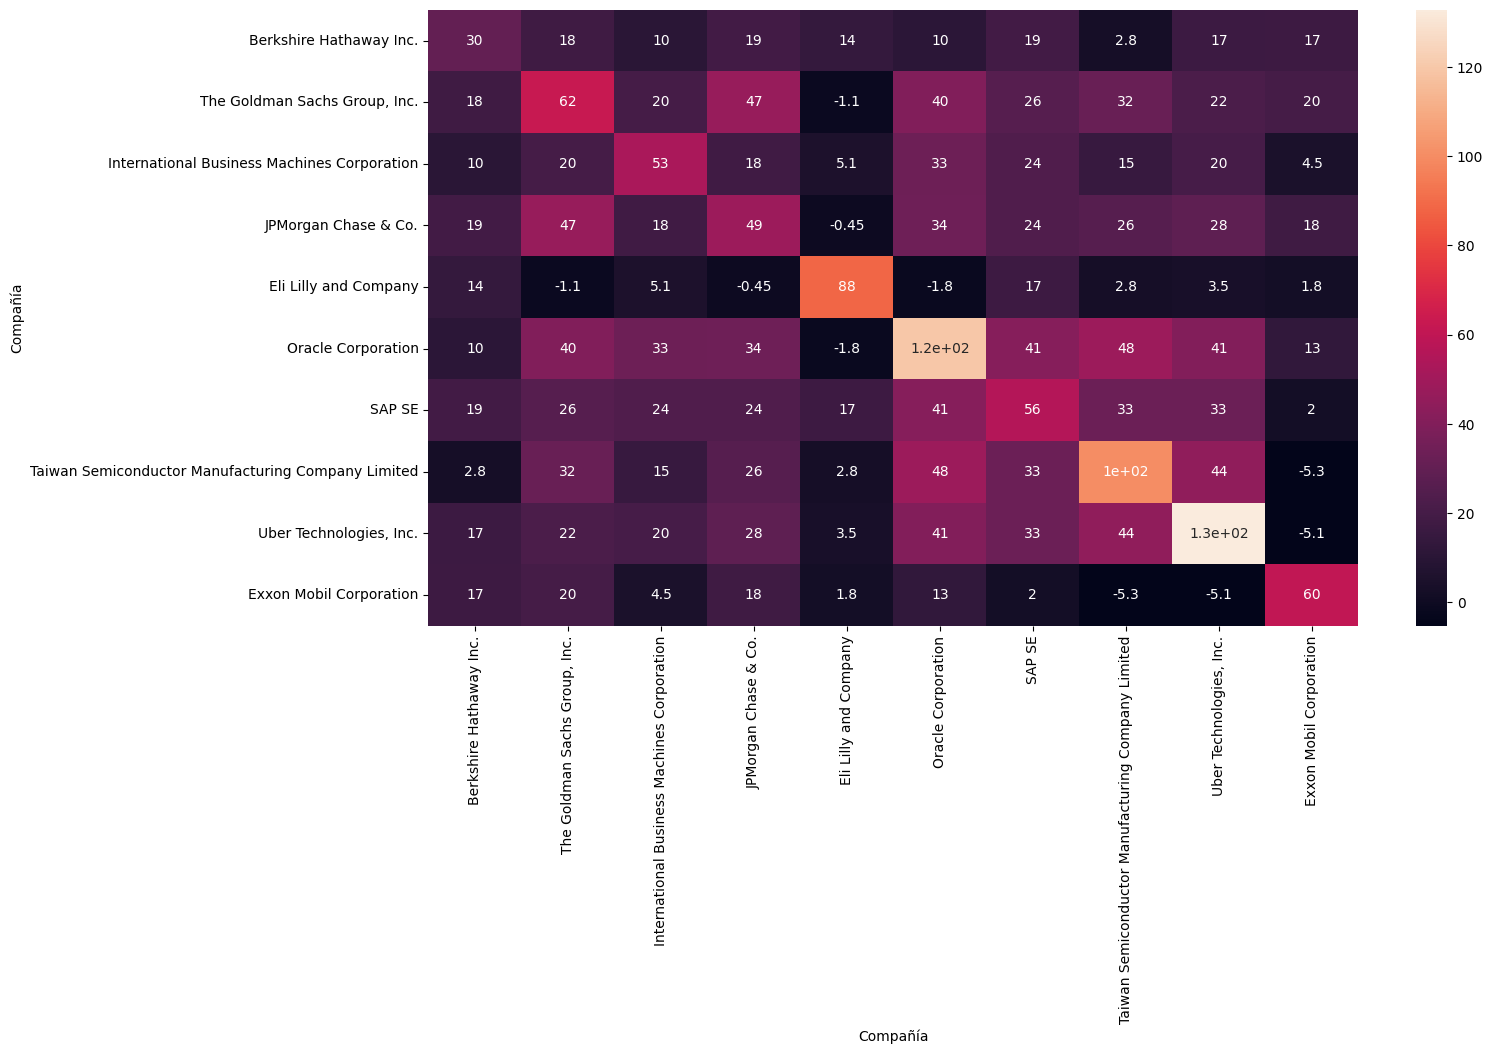

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(cov_matrix,annot=True)
plt.show()

# 3.2 Matriz de Coeficientes de Correlación de Rendimientos Mensuales

In [13]:
corr_matrix = df_r_percentage.drop(columns="S&P 500").corr(method='pearson').copy()
corr_matrix

Compañía,Berkshire Hathaway Inc.,"The Goldman Sachs Group, Inc.",International Business Machines Corporation,JPMorgan Chase & Co.,Eli Lilly and Company,Oracle Corporation,SAP SE,Taiwan Semiconductor Manufacturing Company Limited,"Uber Technologies, Inc.",Exxon Mobil Corporation
Compañía,,,,,,,,,,
Berkshire Hathaway Inc.,1.000000,0.411025,0.259937,0.487201,0.274593,0.174382,0.457845,0.051428,0.267370,0.408668
"The Goldman Sachs Group, Inc.",0.411025,1.000000,0.344979,0.850609,-0.014216,0.460696,0.437282,0.401888,0.242803,0.322049
International Business Machines Corporation,0.259937,0.344979,1.000000,0.359286,0.074248,0.418408,0.434377,0.205810,0.241819,0.080356
JPMorgan Chase & Co.,0.487201,0.850609,0.359286,1.000000,-0.006932,0.445238,0.452485,0.369053,0.352494,0.326095
Eli Lilly and Company,0.274593,-0.014216,0.074248,-0.006932,1.000000,-0.017070,0.244708,0.029322,0.032348,0.024175
Oracle Corporation,0.174382,0.460696,0.418408,0.445238,-0.017070,1.000000,0.505041,0.440865,0.321540,0.151212
SAP SE,0.457845,0.437282,0.434377,0.452485,0.244708,0.505041,1.000000,0.434766,0.381796,0.034862
Taiwan Semiconductor Manufacturing Company Limited,0.051428,0.401888,0.205810,0.369053,0.029322,0.440865,0.434766,1.000000,0.385105,-0.067525
"Uber Technologies, Inc.",0.267370,0.242803,0.241819,0.352494,0.032348,0.321540,0.381796,0.385105,1.000000,-0.056988


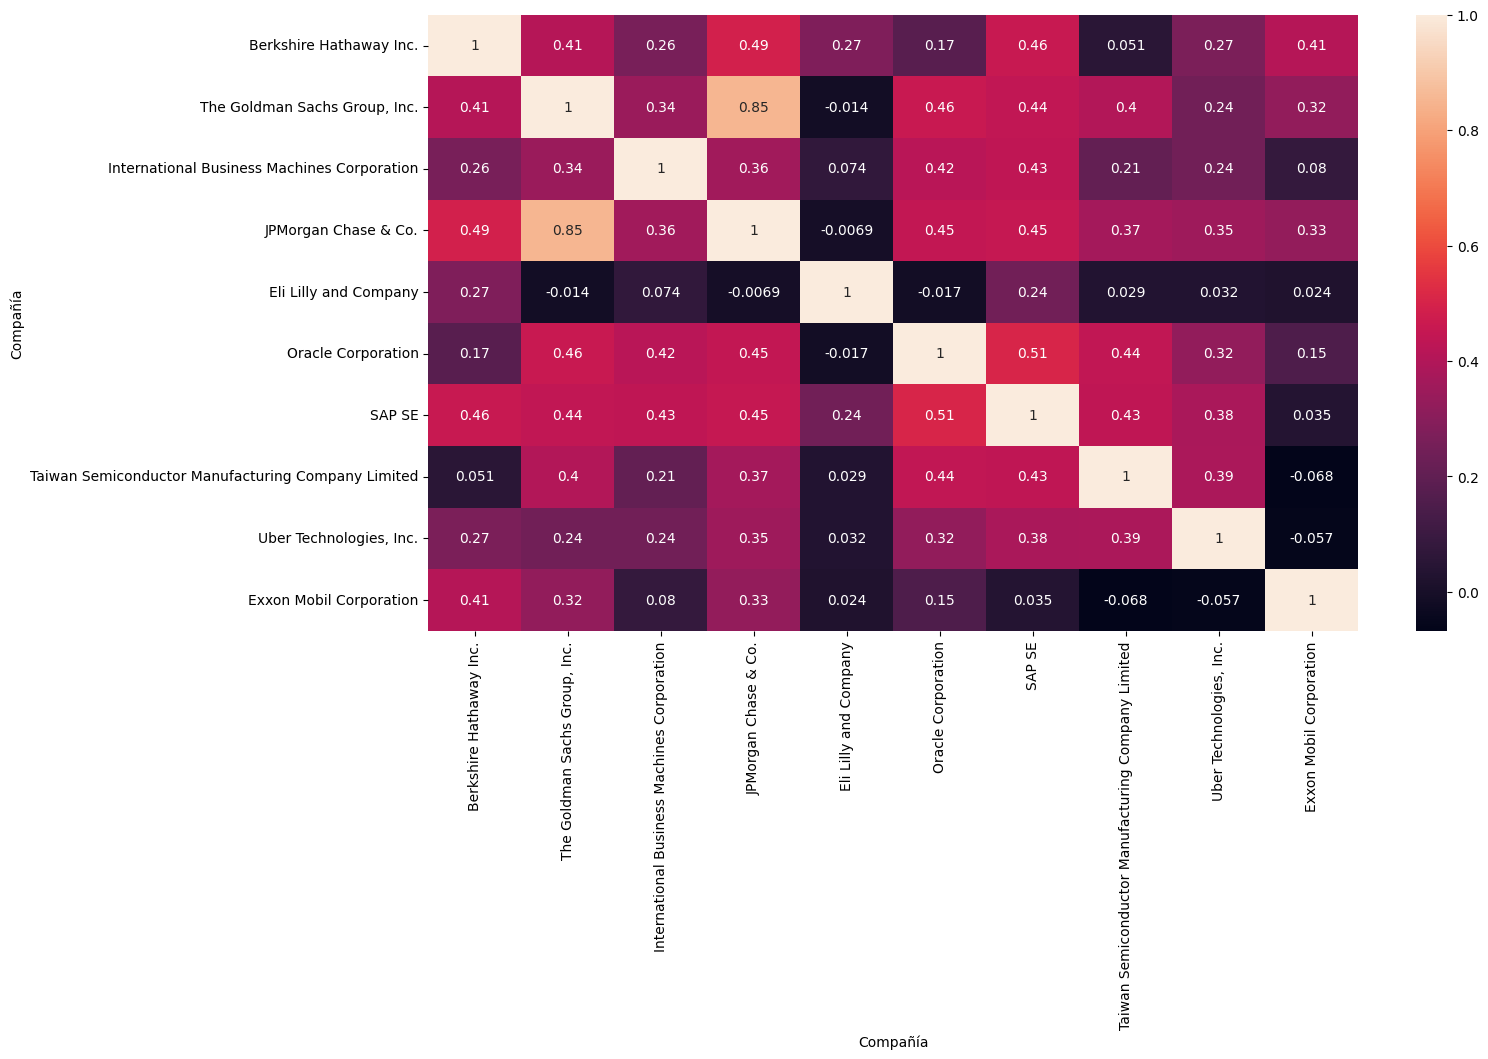

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

# 4. Promedio, Varianza y Desviación Estándar de Rendimiento Mensual del índice S&P 500

In [15]:
sp_500_stats = df_r_percentage["S&P 500"].agg(mean="mean", var=lambda values : values.var(ddof=0), std=lambda values : values.std(ddof=0)).rename(index={"mean":"Promedio","var":"Varianza","std":"Desviación Estándar"})
sp_500_stats

Promedio                1.118600
Varianza               18.943912
Desviación Estándar     4.352460
Name: S&P 500, dtype: float64

# 5. Generación de Portafolios con Participaciones Aleatorias

Para la generación de los pesos de forma aleatoria usamos la distribución de Dirichlet, que por su definición, garantiza que la suma de todos los pesos generados sumará 1. La definición se puede consultar en https://en.wikipedia.org/wiki/Dirichlet_distribution.

In [16]:
np.random.seed(42) # Garantizamos reproducibilidad
pesos_portafolios = pd.DataFrame(np.random.dirichlet(alpha=np.ones(10),size=10000), columns=df.drop(columns="S&P 500").columns)
pesos_portafolios

Compañía,Berkshire Hathaway Inc.,"The Goldman Sachs Group, Inc.",International Business Machines Corporation,JPMorgan Chase & Co.,Eli Lilly and Company,Oracle Corporation,SAP SE,Taiwan Semiconductor Manufacturing Company Limited,"Uber Technologies, Inc.",Exxon Mobil Corporation
0,0.045694,0.293107,0.128217,0.088897,0.016517,0.016514,0.005827,0.195841,0.089495,0.119892
1,0.002610,0.439637,0.224167,0.029951,0.025182,0.025424,0.045519,0.093350,0.070965,0.043194
2,0.159453,0.025313,0.058216,0.076878,0.102599,0.259125,0.037529,0.121654,0.151220,0.008014
3,0.082154,0.016422,0.005908,0.261191,0.296056,0.145131,0.031909,0.009027,0.101251,0.050952
4,0.019316,0.101445,0.005193,0.356246,0.044442,0.161211,0.055438,0.108949,0.117425,0.030333
...,...,...,...,...,...,...,...,...,...,...
9995,0.021036,0.051745,0.094613,0.292410,0.274831,0.051273,0.082097,0.011160,0.087078,0.033757
9996,0.222434,0.145655,0.015923,0.059564,0.280484,0.046661,0.052460,0.036876,0.059824,0.080119
9997,0.007499,0.007725,0.116589,0.323034,0.053766,0.157211,0.161693,0.036704,0.031726,0.104053
9998,0.237139,0.188768,0.037786,0.043085,0.130929,0.037515,0.187680,0.069936,0.034016,0.033145


In [17]:
pesos_portafolios_t = pesos_portafolios.transpose()
pesos_portafolios_t

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Compañía,,,,,,,,,,,,,,,,,,,,,
Berkshire Hathaway Inc.,0.045694,0.002610,0.159453,0.082154,0.019316,0.245051,0.047730,0.183823,0.212854,0.017635,...,0.089064,0.111925,0.031162,0.047520,0.012280,0.021036,0.222434,0.007499,0.237139,0.126268
"The Goldman Sachs Group, Inc.",0.293107,0.439637,0.025313,0.016422,0.101445,0.104694,0.030702,0.027526,0.104504,0.172940,...,0.125999,0.017653,0.037215,0.230880,0.001750,0.051745,0.145655,0.007725,0.188768,0.010973
International Business Machines Corporation,0.128217,0.224167,0.058216,0.005908,0.005193,0.196802,0.171139,0.000688,0.043011,0.198036,...,0.163587,0.099826,0.248165,0.080148,0.365733,0.094613,0.015923,0.116589,0.037786,0.221455
JPMorgan Chase & Co.,0.088897,0.029951,0.076878,0.261191,0.356246,0.158008,0.042793,0.209967,0.007029,0.114066,...,0.061759,0.213130,0.165413,0.088443,0.078626,0.292410,0.059564,0.323034,0.043085,0.043965
Eli Lilly and Company,0.016517,0.025182,0.102599,0.296056,0.044442,0.063918,0.031986,0.152465,0.039872,0.204058,...,0.029619,0.022194,0.085813,0.038041,0.047297,0.274831,0.280484,0.053766,0.130929,0.153070
Oracle Corporation,0.016514,0.025424,0.259125,0.145131,0.161211,0.178865,0.075883,0.162226,0.042101,0.094258,...,0.175209,0.152281,0.046177,0.291866,0.030653,0.051273,0.046661,0.157211,0.037515,0.129525
SAP SE,0.005827,0.045519,0.037529,0.031909,0.055438,0.006501,0.014732,0.183293,0.139997,0.102408,...,0.101337,0.030525,0.190770,0.040639,0.005653,0.082097,0.052460,0.161693,0.187680,0.124502
Taiwan Semiconductor Manufacturing Company Limited,0.195841,0.093350,0.121654,0.009027,0.108949,0.015304,0.157165,0.009558,0.108635,0.077229,...,0.010314,0.057627,0.100546,0.000937,0.078195,0.011160,0.036876,0.036704,0.069936,0.092486
"Uber Technologies, Inc.",0.089495,0.070965,0.151220,0.101251,0.117425,0.003247,0.007514,0.055153,0.233591,0.003565,...,0.133736,0.070204,0.048762,0.125601,0.034731,0.087078,0.059824,0.031726,0.034016,0.057032


El calculo de la varianza de un portafolio se calcula con la siguiente ecuación matricial:
$$\sigma^2_p = w^T\Sigma w$$
Como tenemos una matriz de vectores de pesos en lugar de cada vector individual $(W)$, simplemente se reemplazan en la ecuación los vectores de pesos por las matrices de pesos, y se debe tener en cuenta que los resultados de varianza para cada portafolio se ubicarán en la diagonal de la matriz resultante:
$$\overrightarrow{\sigma^2_p} = diag(W^T\Sigma W)$$
Aunque es posible obtener los mismos resultados iterando sobre cada vector de la matriz de vectores, esto es muy ineficiente frente a las operaciones vectorizadas que las librerias **pandas** y **numpy** usan por defecto.

In [18]:
varianzas_portafolios = pd.Series(np.diag(pesos_portafolios @ cov_matrix @ pesos_portafolios_t))
varianzas_portafolios

0       29.930663
1       33.026801
2       33.436647
3       26.155502
4       36.116281
          ...    
9995    24.930563
9996    22.423168
9997    28.911581
9998    23.535085
9999    24.486283
Length: 10000, dtype: float64

In [19]:
riesgos_portafolios = varianzas_portafolios.apply(lambda number : np.sqrt(number))
riesgos_portafolios

0       5.470892
1       5.746895
2       5.782443
3       5.114245
4       6.009682
          ...   
9995    4.993051
9996    4.735311
9997    5.376949
9998    4.851297
9999    4.948362
Length: 10000, dtype: float64

Para el cálculo del rendimiento ponderado nuevamente se usa la multiplicación matricial, ya que se tiene una matriz de pesos y un vector de rendimientos promedio, así, el vector de rendimiento ponderado para cada portafolio se calcula como sigue:
$$\overrightarrow{R_p} = W\mu$$

In [20]:
rendimientos_ponderados = pesos_portafolios @ vector_promedio
rendimientos_ponderados

0       2.244503
1       2.300236
2       2.243079
3       2.528981
4       2.184298
          ...   
9995    2.471069
9996    2.457908
9997    2.170307
9998    2.145487
9999    2.287704
Length: 10000, dtype: float64

In [21]:
resumen_portafolio = pd.concat([pesos_portafolios,rendimientos_ponderados,riesgos_portafolios],axis="columns").rename(columns={0:"Rendimiento [%]",1:"Riesgo [%]"})
resumen_portafolio

,Berkshire Hathaway Inc.,"The Goldman Sachs Group, Inc.",International Business Machines Corporation,JPMorgan Chase & Co.,Eli Lilly and Company,Oracle Corporation,SAP SE,Taiwan Semiconductor Manufacturing Company Limited,"Uber Technologies, Inc.",Exxon Mobil Corporation,Rendimiento [%],Riesgo [%]
0,0.045694,0.293107,0.128217,0.088897,0.016517,0.016514,0.005827,0.195841,0.089495,0.119892,2.244503,5.470892
1,0.002610,0.439637,0.224167,0.029951,0.025182,0.025424,0.045519,0.093350,0.070965,0.043194,2.300236,5.746895
2,0.159453,0.025313,0.058216,0.076878,0.102599,0.259125,0.037529,0.121654,0.151220,0.008014,2.243079,5.782443
3,0.082154,0.016422,0.005908,0.261191,0.296056,0.145131,0.031909,0.009027,0.101251,0.050952,2.528981,5.114245
4,0.019316,0.101445,0.005193,0.356246,0.044442,0.161211,0.055438,0.108949,0.117425,0.030333,2.184298,6.009682
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.021036,0.051745,0.094613,0.292410,0.274831,0.051273,0.082097,0.011160,0.087078,0.033757,2.471069,4.993051
9996,0.222434,0.145655,0.015923,0.059564,0.280484,0.046661,0.052460,0.036876,0.059824,0.080119,2.457908,4.735311
9997,0.007499,0.007725,0.116589,0.323034,0.053766,0.157211,0.161693,0.036704,0.031726,0.104053,2.170307,5.376949
9998,0.237139,0.188768,0.037786,0.043085,0.130929,0.037515,0.187680,0.069936,0.034016,0.033145,2.145487,4.851297


# 6. Gráfica de Portafolios

Se observó que para 1000 portafolios con 10 acciones cada uno, era muy dificil observar la frontera eficiente. A raíz de esto se descubrió la necesidad de aumentar el número de portafolios a medida que aumenta el número de acciones en consideración dentro de cada portafolio, razón por la cual se decidió aumentar el número de portafolios a 10000, que es lo que se observa en la gráfica que se muestra a continuación:

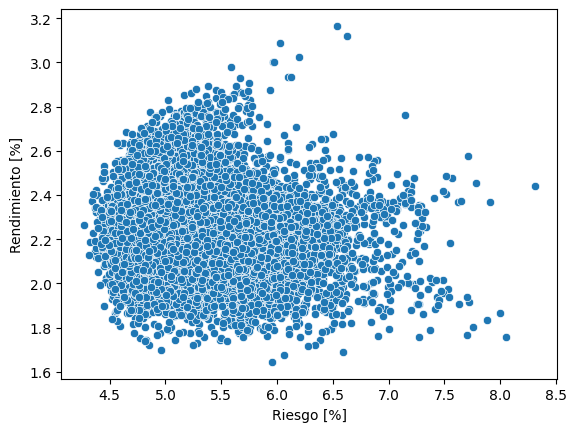

In [22]:
sns.scatterplot(data=resumen_portafolio,x="Riesgo [%]",y="Rendimiento [%]")
plt.show()

En la gráfica anterior se puede observar de forma clara la frontera eficiente.

# 7. Cálculo del portafolio de mínima varianza

## Problema de Optimización

El cálculo del portafolio de mínima varianza es un problema de optimización con restricciones. Es un problema de optimización ya que se busca encontrar los pesos asignados a cada una de las acciones que minimicen la varianza del portafolio, y es uno con restricciones porque el espacio de búsqueda $(R^{10})$ tiene la restricción de que sus componentes deben sumar 1, y además, para obtener resultados "no triviales" o "descompensados", podemos imponer la restricción de un valor mínimo a cada componente (lo cual significa que se impone una participación mínima a cada acción).

Existe una gran variedad de métodos para dar respuesta a este tipo de problemas de optimización. En este caso se usa la librería **scipy**, más específicamente su módulo **optimize**, el cual contiene el método **minimize**. Existen distintos algoritmos de optimización para encontrar los mínimos de una función, para el caso, se usa un estándar para este tipo de problemas: **SLSQP**.

Para más información de cómo funciona la librería, revisar el siguiente enlace: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [23]:
# Función objetivo: varianza del portafolio
def varianza_portafolio(pesos, matriz_covarianzas):
    return pesos.transpose() @ matriz_covarianzas @ pesos

# Restricciones y límites
restricciones = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}  # Suma de pesos = 1
limites = tuple((0.05, 1) for _ in range(len(cov_matrix)))  # Pesos entre 5% y 100%
limites_no_restriccion_minima = tuple((0, 1) for _ in range(len(cov_matrix)))  # Pesos entre 5% y 100%

# Valores iniciales con pesos iguales. Punto desde donde el algoritmo iniciará su búsqueda.
w0 = np.ones(len(cov_matrix)) / len(cov_matrix)

# Optimización
resultado = optimize.minimize(
    varianza_portafolio,
    w0,
    args=(cov_matrix),
    method='SLSQP',
    bounds=limites,
    constraints=restricciones,
    options={'ftol':1e-16} #Definicón de precisión para mejorar el cumplimiento de las condiciones
)
resultado_no_restricciones = optimize.minimize(
    varianza_portafolio,
    w0,
    args=(cov_matrix),
    method='SLSQP',
    bounds=limites_no_restriccion_minima,
    constraints=restricciones,
    options={'ftol':1e-16} #Definicón de precisión para mejorar el cumplimiento de las condiciones
)

pesos_optimizados = pd.Series(resultado.x, index=df.drop(columns="S&P 500").columns)
pesos_optimizados_no_restricciones = pd.Series(resultado_no_restricciones.x, index=df.drop(columns="S&P 500").columns)
print(f"Suma de pesos resultados optimizados: {pesos_optimizados.sum()}")
print(f"Suma de pesos resultados optimizados sin restricciones: {pesos_optimizados_no_restricciones.sum()}")

Suma de pesos resultados optimizados: 1.000000000000071
Suma de pesos resultados optimizados sin restricciones: 1.0


c:\Users\sanco\Documents\administracion_de_portafolio\.venv\lib\site-packages\scipy\optimize\_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


In [24]:
varianza_portafolio_min_var = pesos_optimizados.transpose() @ cov_matrix @ pesos_optimizados
riesgo_portafolio_min_var = np.sqrt(varianza_portafolio_min_var)
rendimiento_min_var = pesos_optimizados @ vector_promedio
print(f"Mínimo riesgo: {riesgo_portafolio_min_var}")
print(f"Rendimiento para el mínimo riesgo: {rendimiento_min_var}\n")

varianza_portafolio_min_var_no_restricciones = pesos_optimizados_no_restricciones.transpose() @ cov_matrix @ pesos_optimizados_no_restricciones
riesgo_portafolio_min_var_no_restricciones = np.sqrt(varianza_portafolio_min_var_no_restricciones)
rendimiento_min_var_no_restricciones = pesos_optimizados_no_restricciones @ vector_promedio
print(f"Mínimo riesgo: {riesgo_portafolio_min_var_no_restricciones}")
print(f"Rendimiento para el mínimo riesgo: {rendimiento_min_var_no_restricciones}")

Mínimo riesgo: 4.341242371431907
Rendimiento para el mínimo riesgo: 2.2497293541911407

Mínimo riesgo: 4.199269002788125
Rendimiento para el mínimo riesgo: 2.212364989452709


## Gráfica

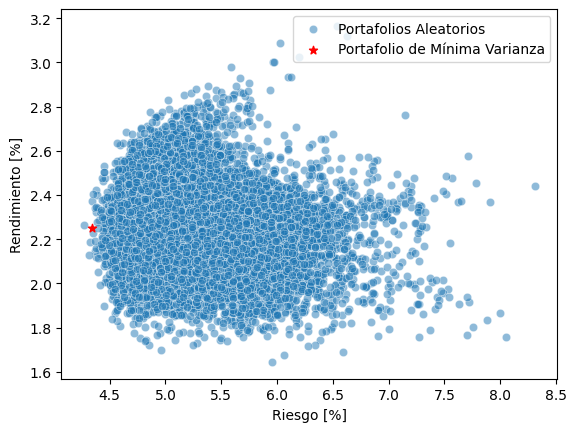

In [25]:
sns.scatterplot(data=resumen_portafolio,x="Riesgo [%]",y="Rendimiento [%]",label="Portafolios Aleatorios",alpha=0.5)
plt.scatter(riesgo_portafolio_min_var,rendimiento_min_var,label="Portafolio de Mínima Varianza",color="red",marker="*")
plt.legend()
plt.show()

Uno podría preguntarse por qué el "portafolio de mínima varianza" parece de hecho no tener el menor riesgo al observar el gráfico. La explicación es simple: Las restricciones impuestas al algoritmo de optimización afectan la solución. Si no se restringe el valor de participación mínimo de cada acción se hubiese obtenido un resultado que no contraria lo esperado, como se muestra a continuación:

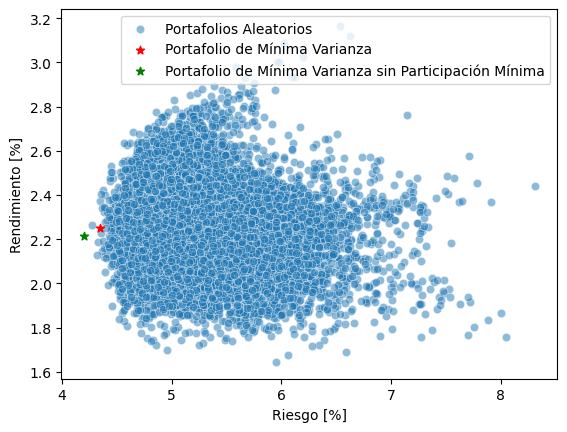

In [26]:
sns.scatterplot(data=resumen_portafolio,x="Riesgo [%]",y="Rendimiento [%]",label="Portafolios Aleatorios",alpha=0.5)
plt.scatter(riesgo_portafolio_min_var,rendimiento_min_var,label="Portafolio de Mínima Varianza",color="red",marker="*")
plt.scatter(riesgo_portafolio_min_var_no_restricciones,rendimiento_min_var_no_restricciones,label="Portafolio de Mínima Varianza sin Participación Mínima",color="green",marker="*")
plt.legend()
plt.show()